In [251]:
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

In [20]:
from tensorflow.keras.models import load_model

In [22]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [263]:
features=features_extractor('./mix_04s (audio-joiner.com).mp3')

In [265]:
features

array([-57.911922  , 102.80276   , -21.043148  ,  29.250742  ,
       -15.798774  ,  18.082462  , -14.861418  ,  -1.4030187 ,
       -13.423492  ,  -4.225247  , -10.274343  ,  -8.807659  ,
       -16.447474  ,  -1.4618157 , -12.1447315 ,  -8.226333  ,
       -10.438253  ,  -1.468695  ,  -9.9084835 ,  -4.7759748 ,
        -5.88327   ,  -3.9064953 , -11.519865  ,  -4.555045  ,
        -7.001912  ,  -4.927685  ,  -6.4805036 ,  -1.426529  ,
        -5.8752646 ,  -0.61216176,  -2.7144878 ,  -2.2289102 ,
        -6.4226246 ,  -0.22541797,  -0.9611291 ,   1.0795074 ,
        -5.000963  ,  -4.5041056 ,  -7.337214  ,   0.54495007],
      dtype=float32)

In [267]:
ipd.Audio(filename="./mix_04s (audio-joiner.com).mp3")

In [215]:
model=load_model('./audio_classification_model_cnn.h5')

C:\Users\kavin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [269]:
model.predict(features.reshape(1,-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[9.9809284e-08, 7.2518452e-07, 1.3847623e-05, 1.2482403e-12,
        9.6648713e-05, 5.1597162e-06, 3.9742248e-11, 1.5565421e-02,
        6.4552530e-13, 9.8431814e-01]], dtype=float32)

In [271]:
import pandas as pd

In [273]:
metadata=pd.read_csv('./UrbanSound8K.csv')

In [275]:
metadata[metadata["classID"]==3]

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
14,100652-3-0-0.wav,100652,0.000000,4.000000,1,2,3,dog_bark
15,100652-3-0-1.wav,100652,0.500000,4.500000,1,2,3,dog_bark
16,100652-3-0-2.wav,100652,1.000000,5.000000,1,2,3,dog_bark
17,100652-3-0-3.wav,100652,1.500000,5.500000,1,2,3,dog_bark
...,...,...,...,...,...,...,...,...
8594,97193-3-0-4.wav,97193,2.000000,6.000000,1,2,3,dog_bark
8595,97193-3-0-6.wav,97193,3.000000,7.000000,1,2,3,dog_bark
8611,97392-3-0-0.wav,97392,0.000000,2.773946,1,6,3,dog_bark
8618,97756-3-0-0.wav,97756,0.141727,1.290466,1,10,3,dog_bark


In [277]:
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [279]:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [281]:
classes=['air_conditioner','car_horn','children_playing','dog_bark','drilling' , 'engine_idling', 'gun_shot','jackhammer', 'siren', 'street_music',]

In [283]:
classes

['air_conditioner',
 'car_horn',
 'children_playing',
 'dog_bark',
 'drilling',
 'engine_idling',
 'gun_shot',
 'jackhammer',
 'siren',
 'street_music']

In [285]:
s=pd.Series(model.predict(features.reshape(1,-1))[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


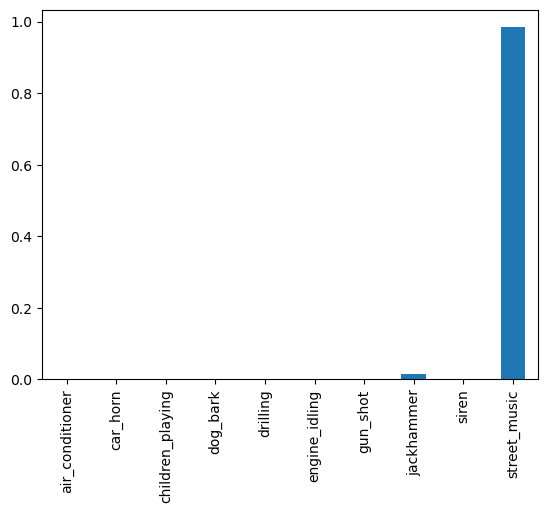

In [287]:
s.plot(kind="bar")
plt.xticks(ticks=range(len(classes)), labels=classes)
plt.show()